In [1]:
import pandas as pd

READ IN AND MERGE

In [2]:
weather = pd.read_csv('clean-data/station_data/master-weather.csv')
whiskey = pd.read_csv('clean-data/Whiskey_data/Whiskey_Advocate_All_scraped_KHupdate-23 Jul.csv')

In [3]:
whiskey.head()

,row,Maker,distilled,age in cast,ABV,Blended,Bourbon,Flavored,Other,Rye,Scotch,single blended grain,single blended malt,world,review score,price,style,country
0,1,Johnnie Walker,NaN,NaN,40.00%,1,0,0,0,0,1,0,0,0,97,225,Blended Scotch Whisky,UK
1,2,Black Bowmore,1964.0,42 year old,40.50%,0,0,0,0,0,1,0,1,0,97,4500,Single Malt Scotch,UK
2,3,Bowmore,NaN,46 year old,42.90%,0,0,0,0,0,1,0,1,0,97,13500,Single Malt Scotch,UK
3,4,Compass Box,NaN,30 years old,53.40%,1,0,0,0,0,1,0,1,0,96,325,Blended Malt Scotch Whisky,UK
4,5,Chivas,NaN,NaN,40.00%,1,0,0,0,0,1,0,1,0,96,160,Blended Malt Scotch Whisky,UK


In [4]:
whiskey['country'].unique()

array(['UK', 'IE', 'US', 'FR', 'BE', 'UK ', 'SE', 'FI', 'JP', 'IN', 'TW',
       'NL', 'AU', 'AT', 'CH', 'CZ', 'DK', 'ES', 'MX', 'LI', 'NZ', 'AR',
       'ZA', 'IT', 'IS', 'BT', 'UT', 'CA', 'GE'], dtype=object)

In [5]:
for i in range(len(weather)):
    if weather['country'][i] == 'Scotland':
        weather['country'][i]="UK"
    if weather['country'][i]=='Ireland':
        weather['country'][i]='IE'
    if weather['country'][i]=='Japan':
        weather['country'][i]='JP'
    if weather['country'][i]=='USA':
        weather['country'][i]="US"
    if weather['country'][i]=='Canada':
        weather['country'][i]="CA"

/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/Elsa/anaconda3/lib/python

In [6]:
weather['country'].unique()

array(['US', 'JP', 'CA', 'IE', 'UK'], dtype=object)

In [7]:
whiskey['temperature']=''
whiskey['precipitation']=''
for i in range(len(whiskey)):
    for j in range(len(weather)):
        if whiskey['distilled'][i] == weather['Year'][j] and whiskey['country'][i] == weather['country'][j]:
            print(f"{whiskey['distilled'][i]}, {whiskey['country'][i]}")

1976.0, UK
1974.0, UK
1982.0, UK
2009.0, UK
2010.0, UK
1973.0, UK
1973.0, UK
2008.0, UK
2018.0, UK
1974.0, UK
1976.0, UK
2012.0, UK
2014.0, UK
2017.0, UK
2017.0, UK
1977.0, UK
1973.0, UK
2017.0, UK
2017.0, UK
2017.0, UK
2017.0, UK
2015.0, UK
2017.0, UK
2016.0, UK
1974.0, UK
1973.0, UK
1989.0, UK
1991.0, UK
2015.0, UK
2017.0, UK
2018.0, UK
1973.0, UK
1973.0, UK
1975.0, UK
1983.0, UK
2011.0, UK
2014.0, UK
1993.0, UK
2009.0, UK
2014.0, UK
2017.0, UK
2015.0, UK
2013.0, UK
1990.0, UK
2012.0, UK
2017.0, UK
2018.0, UK
1990.0, UK
1982.0, UK
1992.0, UK
1995.0, UK
2010.0, UK
1981.0, UK
1983.0, UK
2018.0, UK
2018.0, UK
1987.0, UK
1990.0, UK
1998.0, UK
1974.0, UK
2012.0, UK
2013.0, UK
1990.0, UK
2017.0, UK
2018.0, UK
2011.0, UK
1989.0, UK
2009.0, UK
2012.0, UK
1973.0, UK
1990.0, UK
2015.0, UK
2017.0, UK
2014.0, UK
2014.0, UK
2015.0, UK
1982.0, UK
2013.0, UK
2014.0, UK
1992.0, UK
1996.0, UK
1974.0, UK
1977.0, UK
2011.0, UK
1987.0, UK
2004.0, UK
1991.0, UK
1990.0, UK
2000.0, UK
2007.0, UK
2009.0, UK

In [8]:
weather = weather.rename(columns={'Year':'distilled'})

In [41]:
df = pd.merge(whiskey, weather, on=['distilled', 'country'], how='outer')

In [10]:
print(len(weather))
print(len(whiskey))
print(len(df))

234
4726
4854


In [19]:
df.to_csv('clean-data/Whiskey_data/weather_whiskey Jul23.csv')

In [31]:
list(df)

['row',
 'Maker',
 'distilled',
 'age in cast',
 'ABV',
 'Blended',
 'Bourbon',
 'Flavored',
 'Other',
 'Rye',
 'Scotch',
 'single blended grain',
 'single blended malt',
 'world',
 'review score',
 'price',
 'style',
 'country',
 'Unnamed: 0',
 'Temperature',
 'Precipitation']

In [26]:
import matplotlib.pyplot as plt

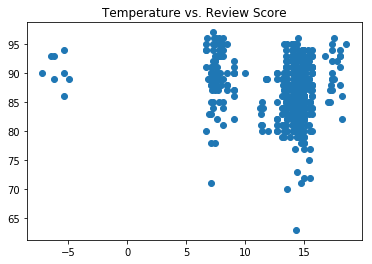

In [33]:
x_axis = df['Temperature']
y_axis = df['review score']

plt.scatter(x_axis, y_axis)
plt.title('Temperature vs. Review Score')
plt.show()

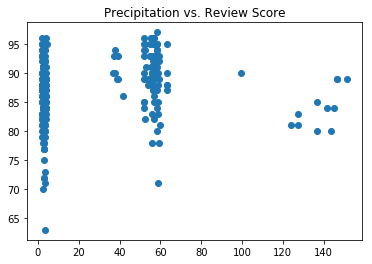

In [34]:
x_axis = df['Precipitation']
y_axis = df['review score']
plt.scatter(x_axis, y_axis)
plt.title('Precipitation vs. Review Score')
plt.show()

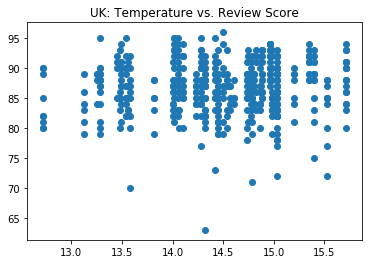

In [36]:
uk = df[df['country']=='UK']
x_axis = uk['Temperature']
y_axis=uk['review score']
plt.scatter(x_axis, y_axis)
plt.title('UK: Temperature vs. Review Score')
plt.show()

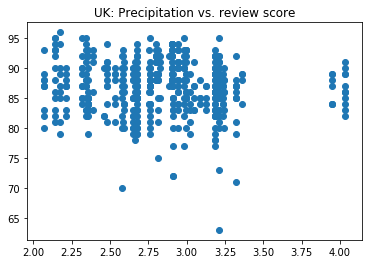

In [38]:
plt.scatter(uk['Precipitation'], uk['review score'])
plt.title('UK: Precipitation vs. review score')
plt.show()

In [40]:
len(ie)

296

In [41]:
len(uk)

2511

In [42]:
us = df[df['country']=='US']
len(us)

1311

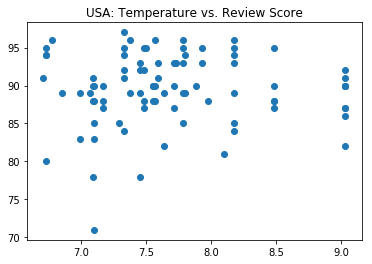

In [43]:
plt.scatter(us['Temperature'], us['review score'])
plt.title('USA: Temperature vs. Review Score')
plt.show()

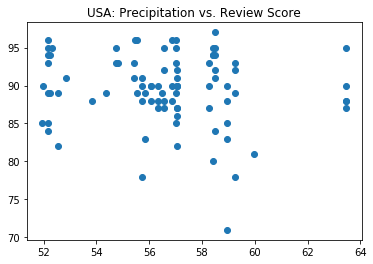

In [44]:
plt.scatter(us['Precipitation'], us['review score'])
plt.title('USA: Precipitation vs. Review Score')
plt.show()

In [45]:
len(df[df['country']=='CA'])

307

In [46]:
len(df[df['country']=='JP'])

132

CREATE THE MODEL

In [49]:
dfm =  pd.merge(whiskey, weather, on=['distilled', 'country'], how='inner')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
X = dfm[['Temperature', 'Precipitation']]
y = dfm['review score'].values.reshape(-1,1)

In [71]:
model=LinearRegression()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(training_score)
print(testing_score)

0.015081404744213378
0.040407628692411775


In [96]:
#KNN -- temperature only

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [89]:
X = dfm['Temperature']
y = dfm['review score'].values.reshape(-1,1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [119]:
train = []
test = []
for k in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train.append(knn.score(X_train, y_train))
    test.append(knn.score(X_test, y_test))

/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ip

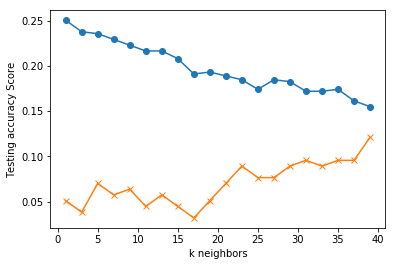

In [120]:
plt.plot(range(1, 40, 2), train, marker='o')
plt.plot(range(1, 40, 2), test, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [121]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train, y_train)
print('k=39 Test Acc: %.3f' % knn.score(X_test, y_test)) 

k=39 Test Acc: 0.121


/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [97]:
#KNN - Precipitation only

In [103]:
X = dfm['Precipitation'].values.reshape(-1,1)
y = dfm['review score'].values.reshape(-1,1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [116]:
train = []
test = []
for k in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train.append(knn.score(X_train, y_train))
    test.append(knn.score(X_test, y_test))

/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/Elsa/anaconda3/lib/python3.7/site-packages/ip

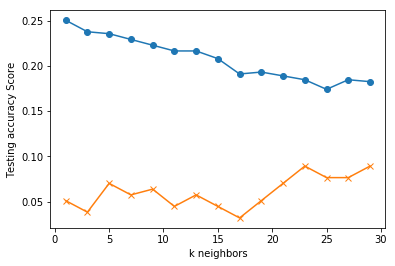

In [117]:
plt.plot(range(1, 30, 2), train, marker='o')
plt.plot(range(1, 30, 2), test, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [118]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
print('k=23 Test Acc: %.3f' % knn.score(X_test, y_test)) 

k=23 Test Acc: 0.089


/Users/Elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
